#1. Check the residuals for autocorrelation
#2. Check for seasonality
#3. Check for trends
#4. Check for outliers
#5. Check for stationarity
#6. Check for normality
#7. Check for homoscedasticity
#8. Check for multicollinearity
#9. Check for endogeneity
#10. Check for exogeneity
#11. Check for overfitting
#12. Check for underfitting
#13. Check for model performance
#14. Check for model assumptions
#15. Check for model selection
#16. Check for model validation
#17. Check for model evaluation
#18. Check for model comparison
#19. Check for model interpretation
#20. Check for model deployment
#21. Check for model monitoring
#22. Check for model maintenance
#23. Check for model optimization
#24. Check for model scalability
#25. Check for model reliability
#26. Check for model security
#27. Check for model privacy
#28. Check for model transparency
#29. Check for model explainability
#30. Check for model fairness
#31. Check for model accountability
#32. Check for model governance
#33. Check for model ethics
#34. Check for model compliance
#35. Check for model regulation

In [8]:
from datetime import datetime
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import statsmodels.api as sm
import warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# TEST 1

                               SARIMAX Results                                
Dep. Variable:            Harga Beras   No. Observations:                  678
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3691.622
Date:                Wed, 15 May 2024   AIC                           7385.243
Time:                        15:09:09   BIC                           7389.761
Sample:                             0   HQIC                          7386.992
                                - 678                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3190.5489     28.189    113.185      0.000    3135.300    3245.798
Ljung-Box (L1) (Q):                  98.84   Jarque-Bera (JB):            156136.46
Prob(Q):                              0.00   Pr

/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_5320/4227742221.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv("../../csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarn

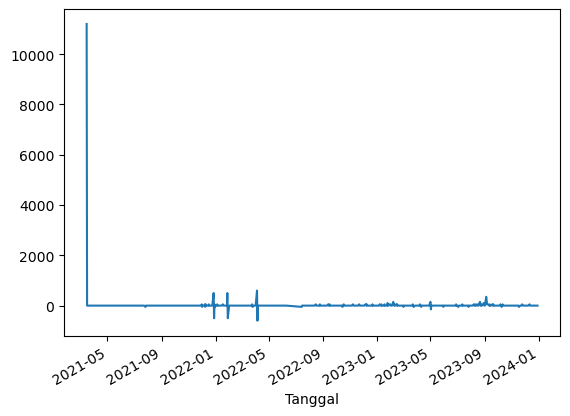

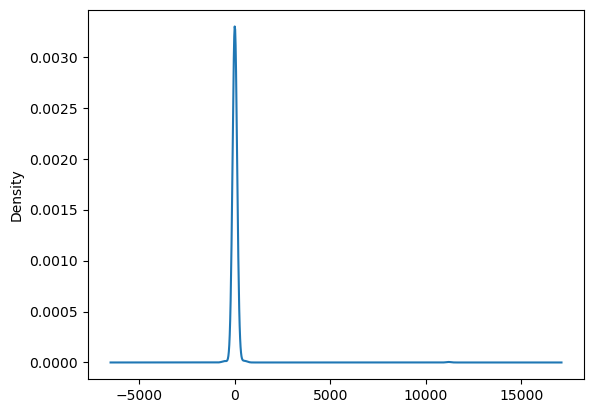

count      678.000000
mean        20.648968
std        433.649135
min       -600.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      11200.000000
dtype: float64


In [9]:
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv("../../csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)

# Select the 'Harga Beras' column for analysis
series = dataset['Harga Beras']

# fit model
model = ARIMA(series, order=(0,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = model_fit.resid
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
print(residuals.describe())


/var/folders/3s/37cdhq1x7fdcds5p4y_vnbp00000gn/T/ipykernel_5320/1971782200.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)


predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12400.000000
predicted=12400.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=12450.000000
predicted=12450.000000, expected=1

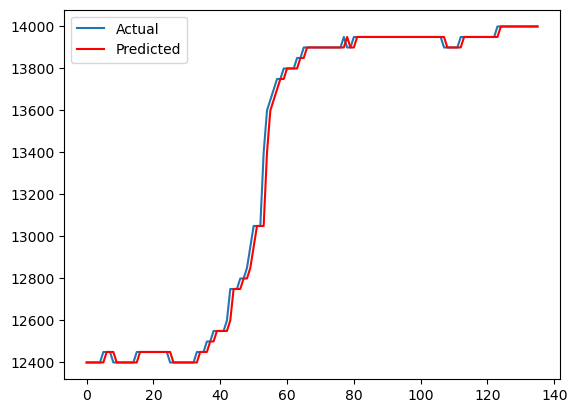

In [10]:
# load dataset
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load your dataset here
dataset = read_csv("https://raw.githubusercontent.com/Danazzz/beras-scm/main/csv/Beras.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)

# # Select the 'Harga Beras' column for analysis
# series = dataset['Harga Beras']

# split into train and test sets
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test, label='Actual')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()

In [11]:
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

check_stationarity(dataset["Harga Beras"])

Results of Dickey-Fuller Test:
Test Statistic                   0.808600
p-value                          0.991774
#Lags Used                       8.000000
Number of Observations Used    669.000000
Critical Value (1%)             -3.440163
Critical Value (5%)             -2.865870
Critical Value (10%)            -2.569076
dtype: float64


Prediction for January 1, 2024: 14000.0


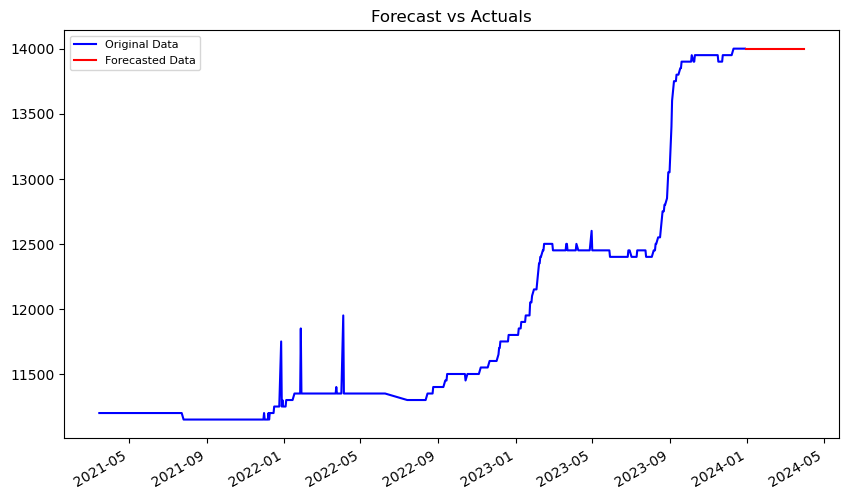

In [12]:
from datetime import datetime

# ...

# Get the last date in the dataset
last_date = dataset.index[-1]

# Calculate the number of days to forecast
days_to_forecast = (datetime(2024, 3, 31) - last_date).days

# Fit the ARIMA model on the entire dataset
model = ARIMA(history, order=(0,1,0))
model_fit = model.fit()

# Forecast for the target date
forecast_result = model_fit.forecast(steps=days_to_forecast)

# Create a date range for the forecasted data
forecast_dates = pd.date_range(start=last_date, periods=days_to_forecast + 1)[1:]

# Create a Series for the forecasted data with the correct dates
forecast_series = pd.Series(forecast_result, index=forecast_dates)

# Get the predicted value for the target date
predicted_value = forecast_series['2024-01-01']

# Print the predicted value
print(f"Prediction for January 1, 2024: {predicted_value}")

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(dataset['Harga Beras'], color='blue', label='Original Data')

# Plot the forecasted data
forecast_series.plot(color='red', label='Forecasted Data')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# TEST 2

In [13]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.808600
p-value: 0.991774
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


<Axes: xlabel='Tanggal'>

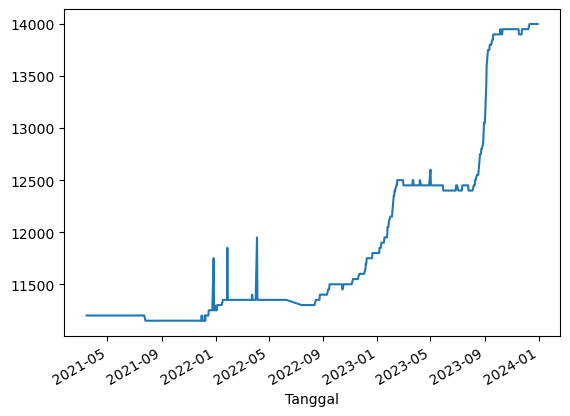

In [14]:
series.plot()

In [15]:
#Membuat fungsi untuk uji stasioneritas
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

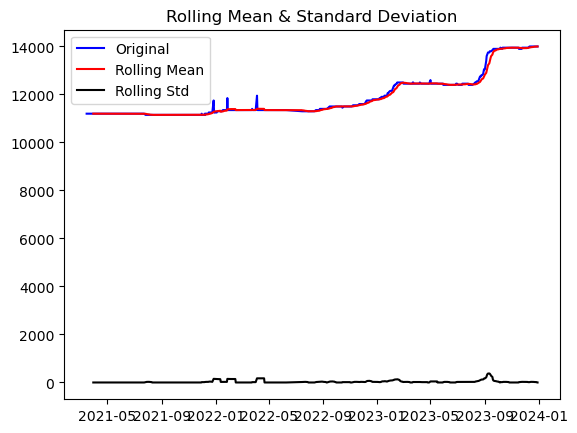

Results of Dickey-Fuller Test:
Test Statistic                   0.808600
p-value                          0.991774
#Lags Used                       8.000000
Number of Observations Used    669.000000
Critical Value (1%)             -3.440163
Critical Value (5%)             -2.865870
Critical Value (10%)            -2.569076
dtype: float64


In [16]:
#Menguji data
test_stationarity(series)

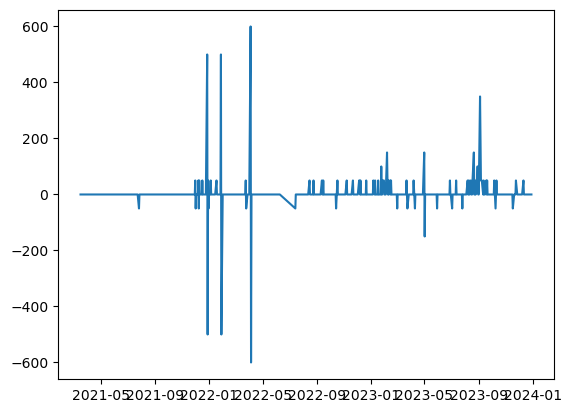

In [17]:
#Melakukan differencing pertama
ts_diff_1 = series - series.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

/Library/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


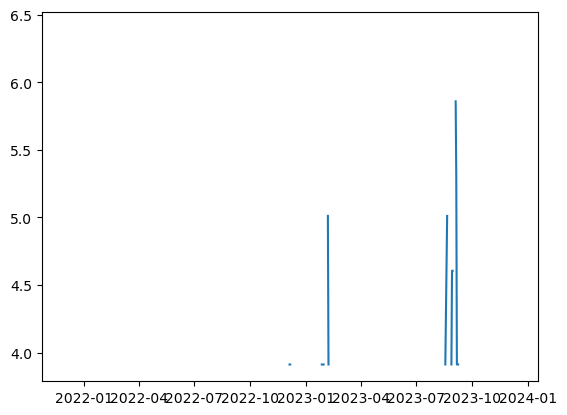

In [18]:

#Mencoba melakukan transformasi log
ts_log_dif = np.log(ts_diff_1)
plt.plot(ts_log_dif)

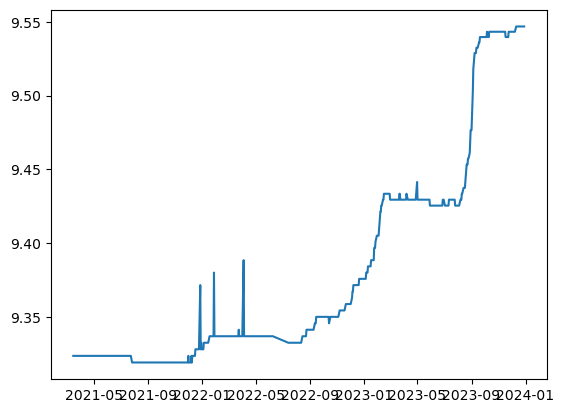

In [19]:
#Mencoba melakukan transformasi log
ts_log = np.log(series)
plt.plot(ts_log)

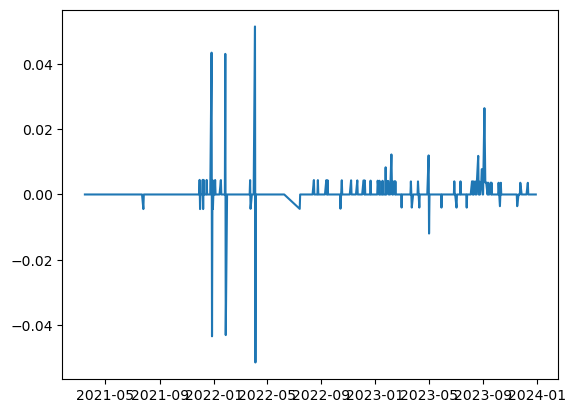

In [20]:
#Melakukan differencing setelah transform log
ts_log_1 = ts_log - ts_log.shift()
ts_log_1 = ts_log_1.dropna()
plt.plot(ts_log_1)

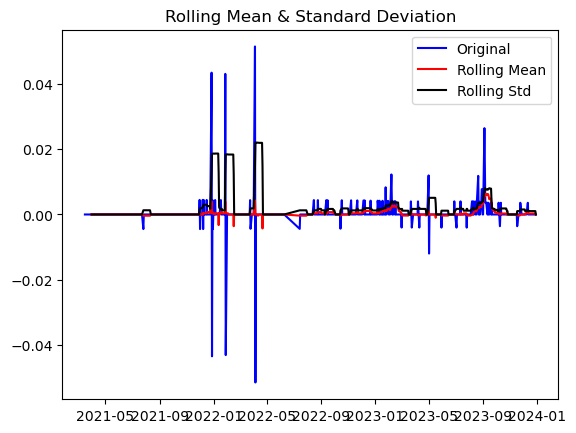

Results of Dickey-Fuller Test:
Test Statistic                -7.062029e+00
p-value                        5.193891e-10
#Lags Used                     7.000000e+00
Number of Observations Used    6.690000e+02
Critical Value (1%)           -3.440163e+00
Critical Value (5%)           -2.865870e+00
Critical Value (10%)          -2.569076e+00
dtype: float64


In [21]:
test_stationarity(ts_log_1)

In [22]:
result = adfuller(ts_log_1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.062029
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


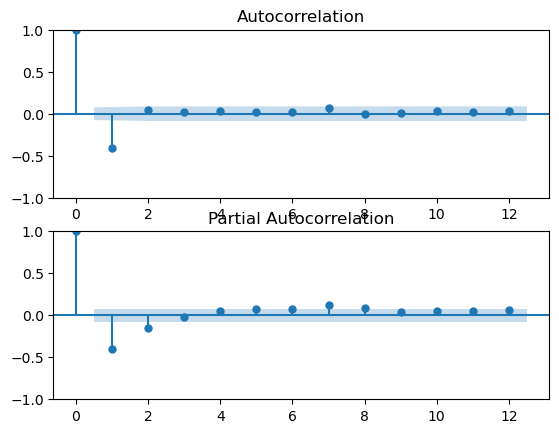

In [23]:
plt.figure()
plt.subplot(211)
plot_acf(ts_log_1, ax=plt.gca(), lags=12)
plt.subplot(212)
plot_pacf(ts_log_1, ax=plt.gca(), lags=12)
plt.show()

In [24]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.8)               #data trainingnya 80%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [25]:
# p_values = range(0, 3)
# d_values = range(0, 2)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(ts_log.values, p_values, d_values, q_values)

# TEST 3

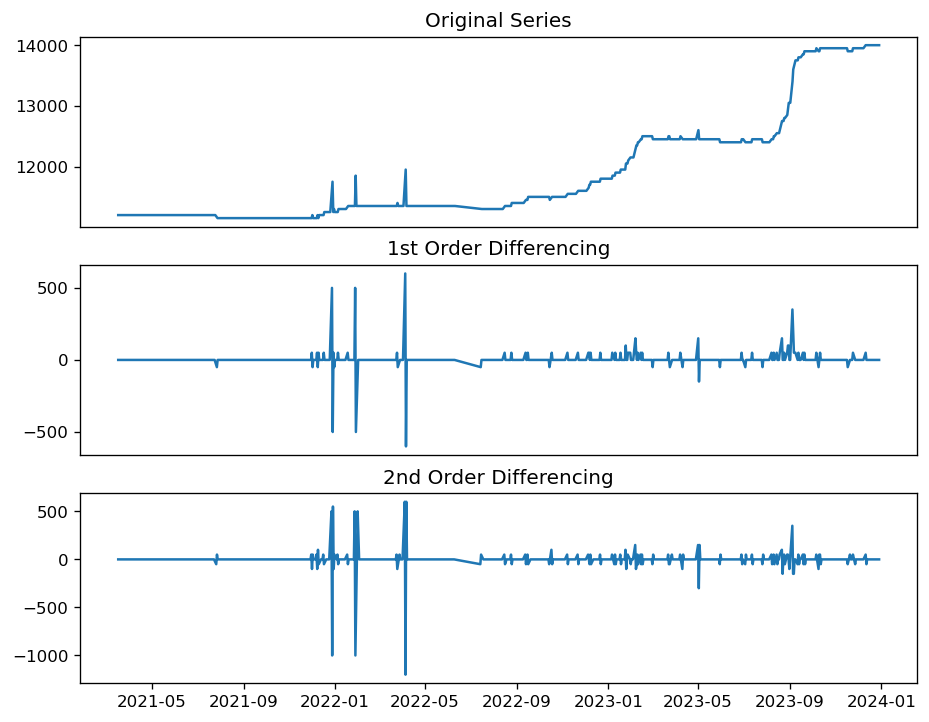

In [26]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(series); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(series.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(series.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

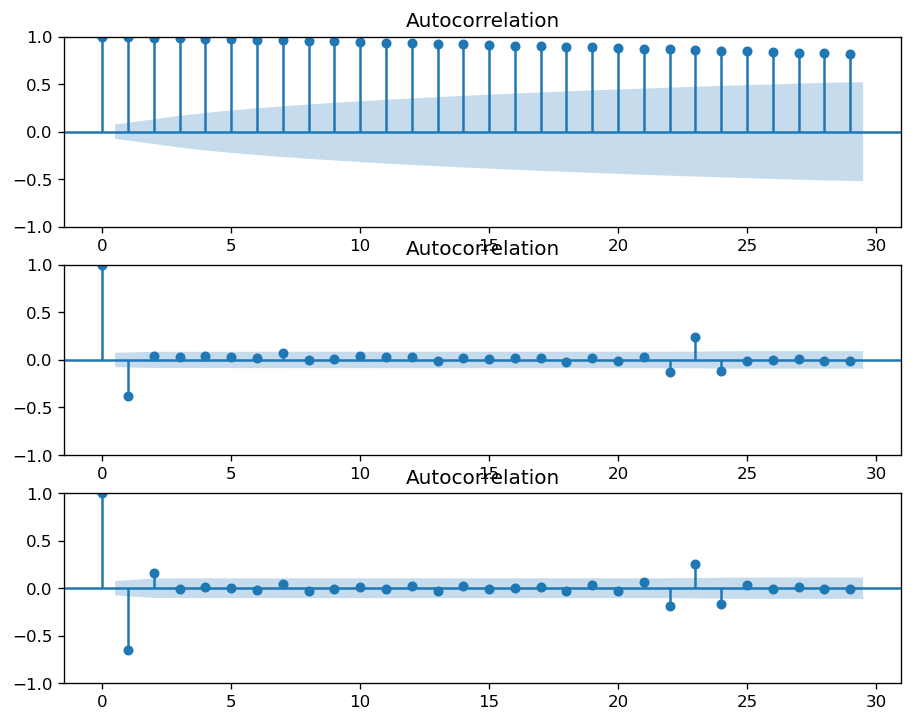

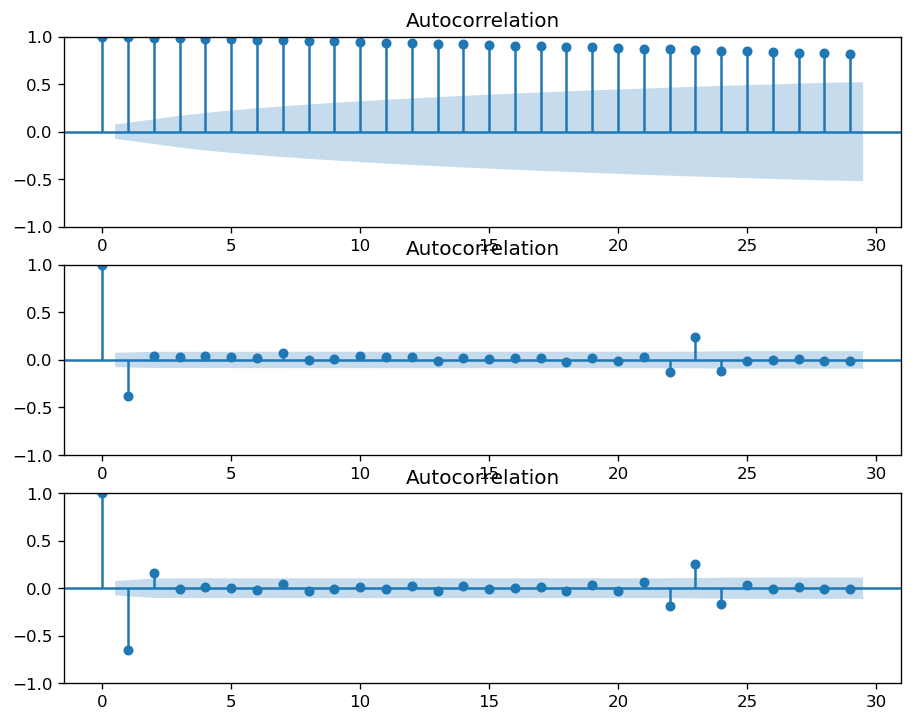

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(series, ax=ax1)
plot_acf(series.diff().dropna(), ax=ax2)
plot_acf(series.diff().diff().dropna(), ax=ax3)

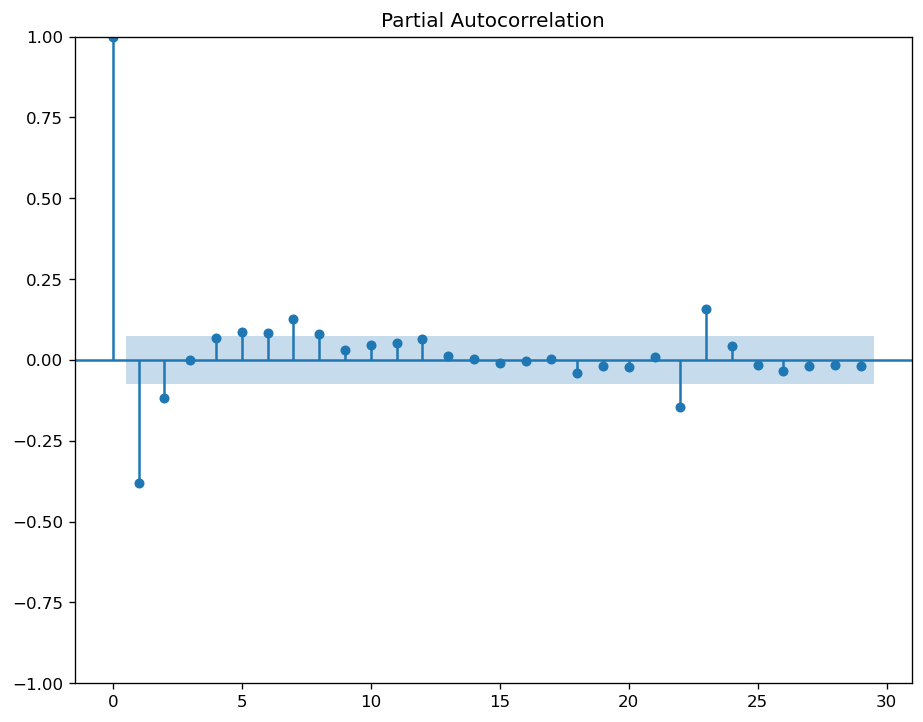

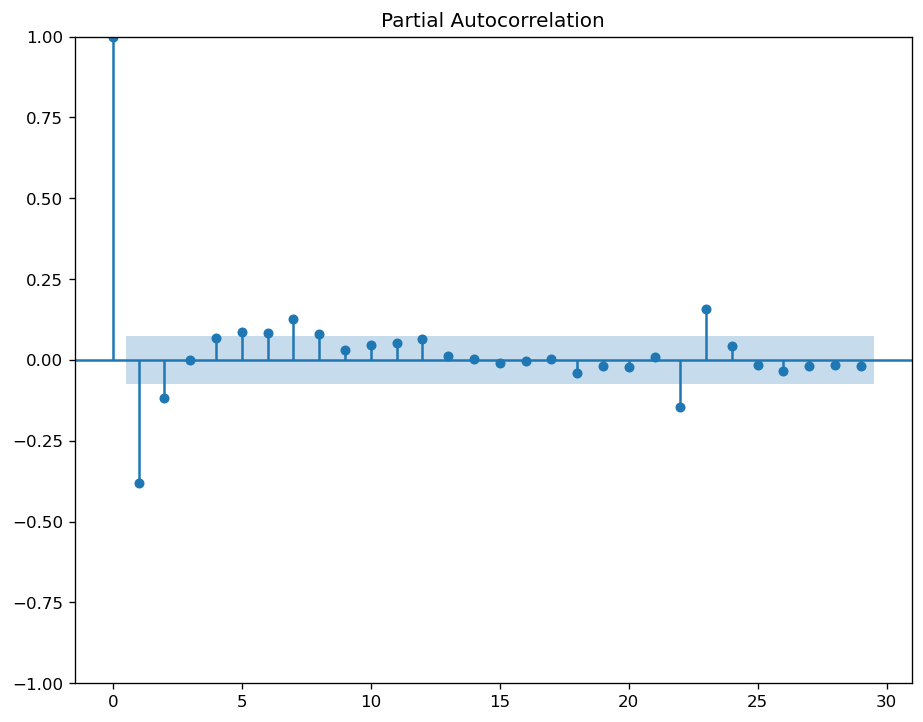

In [28]:
plot_pacf(series.diff().dropna())

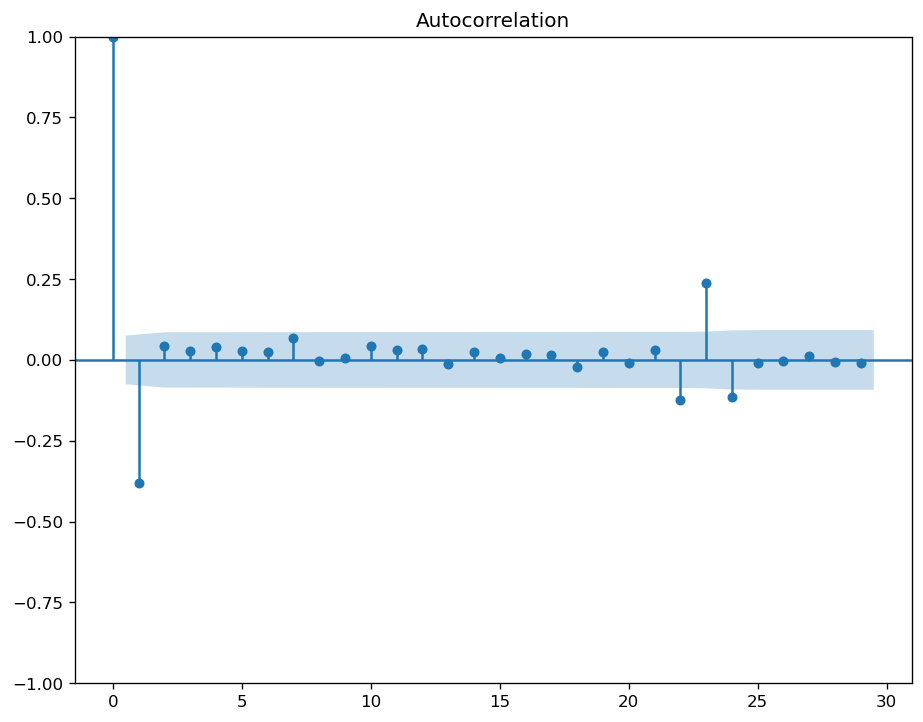

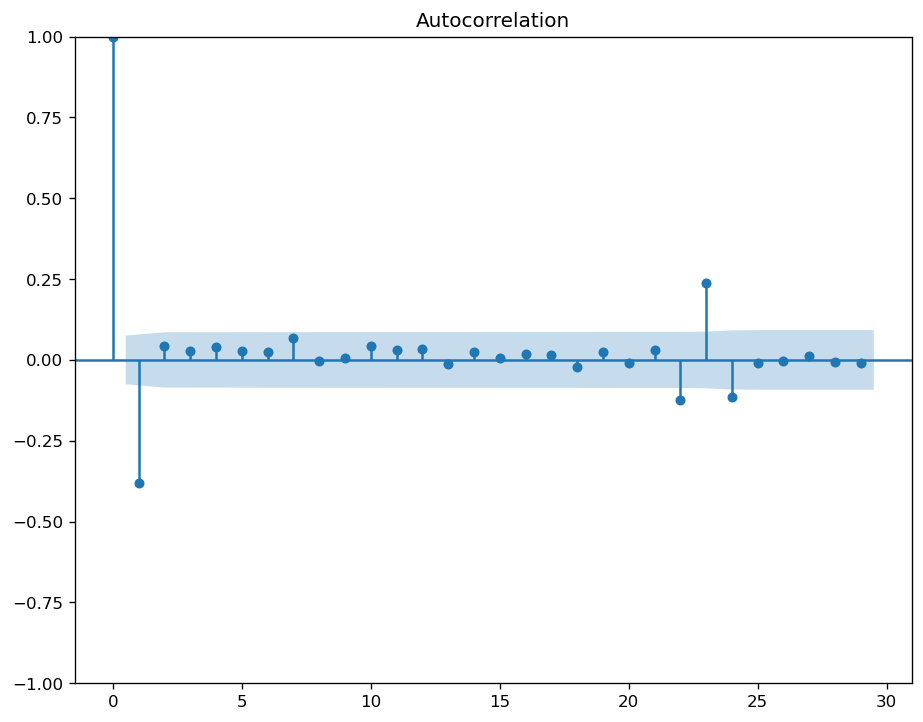

In [29]:
plot_acf(series.diff().dropna())

In [30]:
rmse = sqrt(mean_squared_error(dataset[-len(predictions):]["Harga Beras"], predictions))
mae = mean_absolute_error(dataset[-len(predictions):]["Harga Beras"], predictions)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(dataset[-len(predictions):]["Harga Beras"], predictions)

# Mean Square Error
mse = mean_squared_error(dataset[-len(predictions):]["Harga Beras"], predictions)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
print("Mean Square Error:", mse)

Root Mean Square Error: 43.72373160976031
Mean Absolute Error: 14.705882352941176
R Square: 0.9960
Mean Square Error: 1911.764705882353


# TEST 4 SARIMA

In [31]:
# Calculate z-scores
z_scores = stats.zscore(dataset['Harga Beras'])
# Remove outliers
dataset_no_outliers = dataset['Harga Beras'][z_scores <= 3]
# Apply a differencing operation
ts_log_diff = np.diff(dataset_no_outliers)
# Apply a differencing operation
ts_log_diff = np.diff(dataset_no_outliers)

def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

check_stationarity(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                -6.808757e+00
p-value                        2.142972e-09
#Lags Used                     7.000000e+00
Number of Observations Used    6.690000e+02
Critical Value (1%)           -3.440163e+00
Critical Value (5%)           -2.865870e+00
Critical Value (10%)          -2.569076e+00
dtype: float64


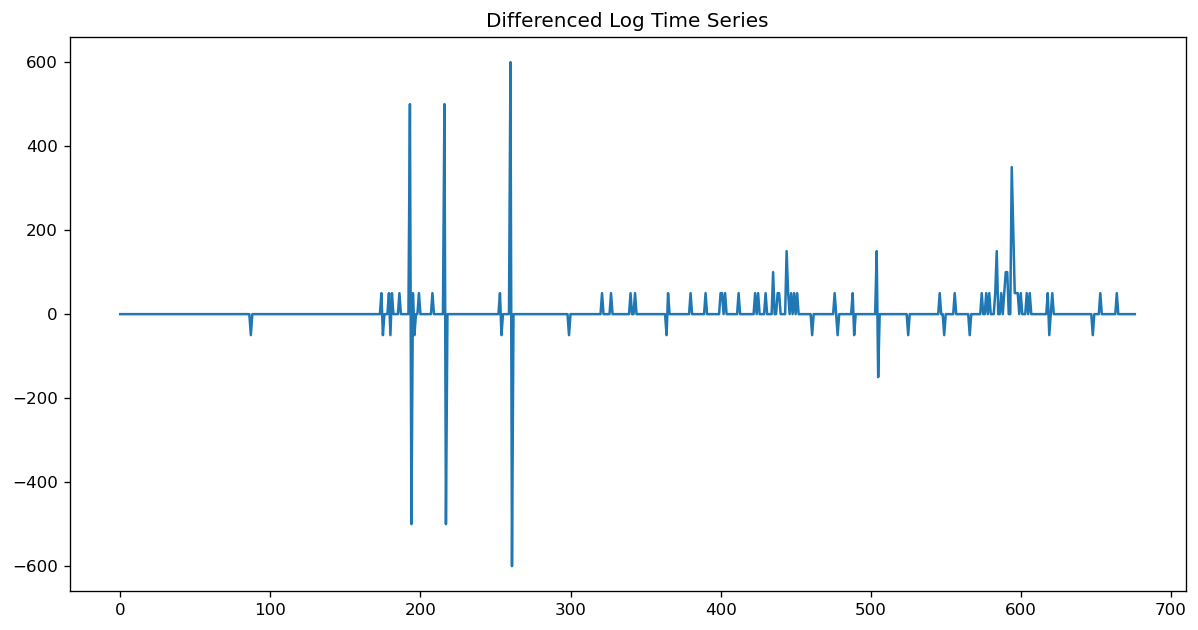

In [32]:
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.title('Differenced Log Time Series')
plt.show()

In [33]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Specify to ignore warning messages
warnings.filterwarnings("ignore")

best_aic = np.inf
best_pdq = None
temp_model = None

for param in pdq:
    try:
        temp_model = ARIMA(dataset['Harga Beras'],order=param)
        results = temp_model.fit(disp=-1)
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print(f"Best ARIMA model: ARIMA{best_pdq} - AIC:{best_aic}")
dataset['Harga Beras']

Best ARIMA model: ARIMANone - AIC:inf


Tanggal
2021-03-15    11200
2021-03-16    11200
2021-03-17    11200
2021-03-18    11200
2021-03-19    11200
              ...  
2023-12-21    14000
2023-12-22    14000
2023-12-27    14000
2023-12-28    14000
2023-12-29    14000
Name: Harga Beras, Length: 678, dtype: int64

0


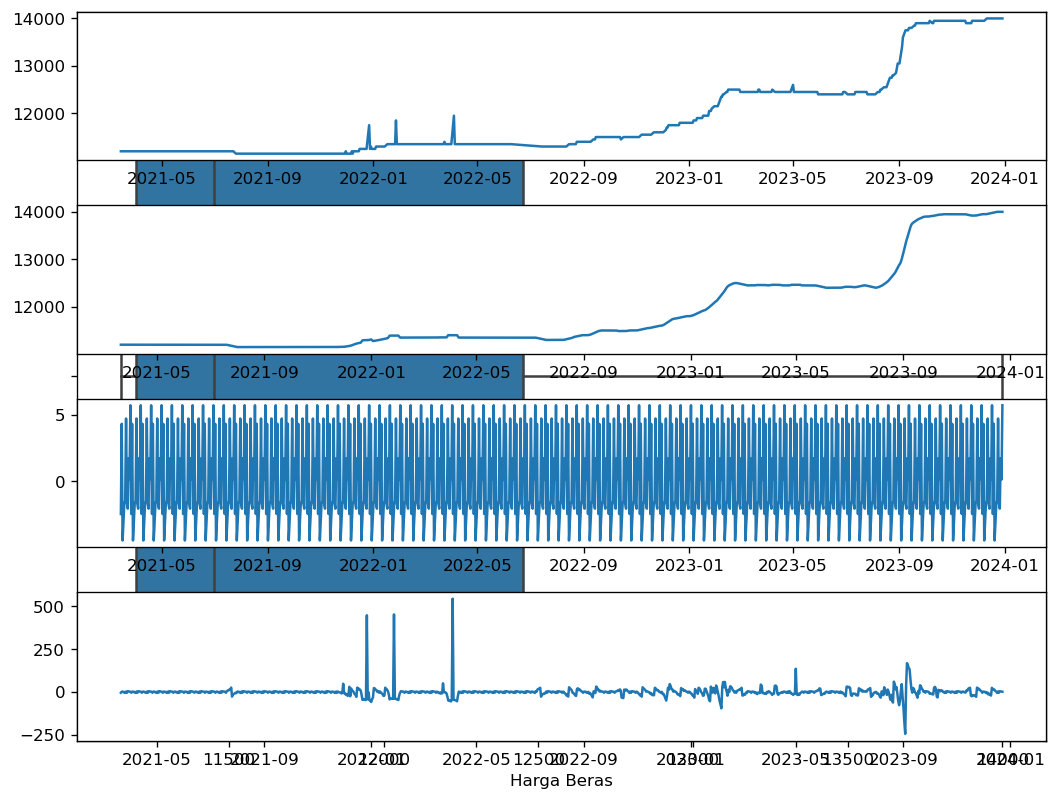

In [34]:
# 1. Check for missing values
print(dataset['Harga Beras'].isnull().sum())

# 2. Check for outliers
sns.boxplot(x=dataset['Harga Beras'])
z_scores = stats.zscore(dataset['Harga Beras'])
abs_z_scores = np.abs(z_scores)
filtered_entries = abs_z_scores < 3
new_df = dataset['Harga Beras'][filtered_entries]

# 3. Check for stationarity
# You've already done this

# 4. Check for seasonality
# Ensure the DataFrame is indexed by date
new_df.index = pd.DatetimeIndex(new_df.index)
# Set the frequency to 'D' for daily frequency
new_df = new_df.asfreq('D')

# Handle any missing values that might have been introduced by asfreq
new_df.fillna(method='ffill', inplace=True)

# decompose the time series
decomposition = seasonal_decompose(new_df, period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset['Harga Beras'], label='Original')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.tight_layout()

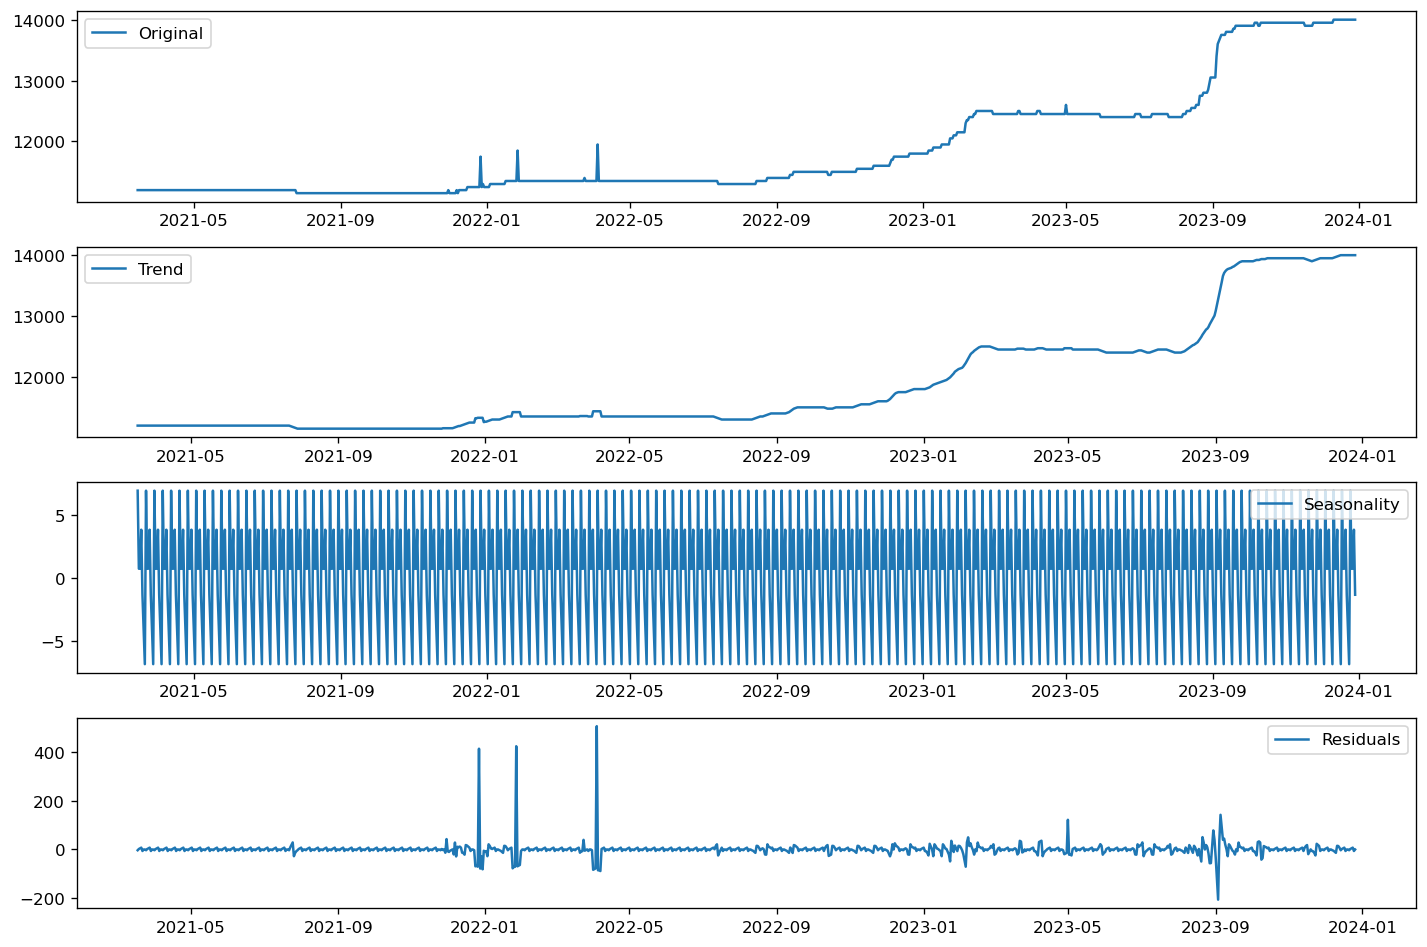

In [35]:
# Decompose the time series
decomposition = seasonal_decompose(new_df)

# Get the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Create subplots to plot each component
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(new_df, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [36]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            print(f"Trying parameters {param} and seasonal parameters {param_seasonal}")
            temp_model = sm.tsa.statespace.SARIMAX(dataset['Harga Beras'],
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                print(f"New best model: SARIMAX{best_pdq}x{best_seasonal_pdq}12 - AIC:{best_aic}")
        except Exception as e:
            print(f"Error with parameters {param} and seasonal parameters {param_seasonal}: {e}")
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Trying parameters (0, 0, 0) and seasonal parameters (0, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07913D+01    |proj g|=  1.50990D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.510D-08   1.079D+01
  F =   10.791289517147076     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best model: SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:14634.988585251434
Trying parameters (0, 0, 0) and seasonal parameters (0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.20305D+00    |proj g|=  9.97718D-04

At iterate   10    f=  6.20258D+00    |proj g|=  3.02228D-02

At iterate   15    f=  6.19513D+00    |proj g|=  9.22820D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     19      1     0     0   8.999D-06   6.195D+00
  F =   6.1950835033261562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best model: SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8404.533230510267
Trying parameters (0, 0, 0) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Trying parameters (0, 0, 0) and seasonal parameters (1, 1, 0, 12)

At iterate    5    f=  6.31011D+00    |proj g|=  2.46296D+00

At iterate   10    f=  6.27999D+00    |proj g|=  5.16707D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   8.672D-04   6.276D+00
  F =   6.2761658822375797     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.19681D+00    |proj g|=  5.69589D-06

   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.01336D+01    |proj g|=  2.64696D-02

At iterate   10    f=  1.01332D+01    |proj g|=  7.56119D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     22      1     0     0   7.561D-05   1.013D+01
  F =   10.133170049816080     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 0, 1) and seasonal parameters (0, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13352D+00    |proj g|=  1.70402D-01

At 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01267D+00    |proj g|=  1.21530D-01

At iterate    5    f=  6.00570D+00    |proj g|=  2.97236D-03

At iterate   10    f=  6.00057D+00    |proj g|=  5.49741D-02

At iterate   15    f=  5.93179D+00    |proj g|=  4.41077D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   8.384D-06   5.929D+00
  F =   5.9291413475576471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
New best

 This problem is unconstrained.



At iterate   25    f=  8.07265D+00    |proj g|=  1.04162D+01

At iterate   30    f=  6.15974D+00    |proj g|=  3.33580D+00

At iterate   35    f=  6.02644D+00    |proj g|=  4.18817D-02

At iterate   40    f=  6.02556D+00    |proj g|=  3.80532D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     86      1     0     0   3.805D-05   6.026D+00
  F =   6.0255560481692862     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 0, 1) and seasonal parameters (1, 0, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =         


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  1.00947D+01    |proj g|=  4.12464D-03

At iterate   20    f=  1.00932D+01    |proj g|=  5.92340D-03

At iterate   25    f=  1.00894D+01    |proj g|=  2.14388D-02

At iterate   30    f=  9.82826D+00    |proj g|=  1.24946D-01

At iterate   35    f=  9.06900D+00    |proj g|=  2.77788D+00

At iterate   40    f=  6.93226D+00    |proj g|=  2.35858D+01

At iterate   45    f=  6.13122D+00    |proj g|=  4.79805D+00

At iterate   50    f=  6.00357D+00    |proj g|=  1.60832D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50    111      1     0     0   1.608D-01   6.004D+00
  F =   6.00356582739

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01868D+00    |proj g|=  1.13348D-01

At iterate    5    f=  6.00559D+00    |proj g|=  1.58321D-02

At iterate   10    f=  6.00516D+00    |proj g|=  1.77715D-02

At iterate   15    f=  5.99279D+00    |proj g|=  1.03527D-01

At iterate   20    f=  5.92952D+00    |proj g|=  4.06767D-03

At iterate   25    f=  5.92914D+00    |proj g|=  2.96599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     32      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   1.452D-06   5.670D+00
  F =   5.6695678273012495     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (0, 1, 0) and seasonal parameters (0, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36229D+00    |proj g|=  2.25876D-01

At iterate    5    f=  5.31272D+00    |proj g|=  4.42571D-03

At iterate   10    f=  5.30958D+00    |proj g|=  1.15445D-01

At 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.34866D+00    |proj g|=  8.99535D-04

At iterate   10    f=  5.34849D+00    |proj g|=  1.15733D-02

At iterate   15    f=  5.34834D+00    |proj g|=  1.29731D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     22      1     0     0   1.297D-05   5.348D+00
  F =   5.3483404234084553     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 1, 0) and seasonal parameters (1, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At 

 This problem is unconstrained.



At iterate    5    f=  5.31210D+00    |proj g|=  4.08465D-02

At iterate   10    f=  5.31176D+00    |proj g|=  2.03000D-02

At iterate   15    f=  5.29924D+00    |proj g|=  1.53283D-01

At iterate   20    f=  5.27928D+00    |proj g|=  4.55626D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     33      1     0     0   2.992D-05   5.279D+00
  F =   5.2790475601916658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 1, 1) and seasonal parameters (0, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =         

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   4.143D-05   5.560D+00
  F =   5.5597904091160215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (0, 1, 1) and seasonal parameters (0, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29744D+00    |proj g|=  1.50836D-01

At iterate    5    f=  5.26200D+00    |proj g|=  2.15383D-02

At iterate   10    f=  5.26011D+00    |proj g|=  4.45015D-02

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.26491D+00    |proj g|=  2.65930D-03

At iterate   20    f=  5.26489D+00    |proj g|=  2.72848D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   2.728D-06   5.265D+00
  F =   5.2648922038294401     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (0, 1, 1) and seasonal parameters (1, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39722D+00    |proj g|=  8.93667D-02

At 

 This problem is unconstrained.
 This problem is unconstrained.


Trying parameters (0, 1, 1) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31235D+00    |proj g|=  1.24849D-01

At iterate    5    f=  5.26196D+00    |proj g|=  2.59424D-02

At iterate   10    f=  5.26133D+00    |proj g|=  3.81089D-02

At iterate   15    f=  5.21063D+00    |proj g|=  2.18301D-01

At iterate   20    f=  5.19331D+00    |proj g|=  9.31874D-03

At iterate   25    f=  5.19326D+00    |proj g|=  2.36797D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip 

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  5.60510D+00    |proj g|=  1.93765D+00

At iterate   10    f=  5.60207D+00    |proj g|=  2.49762D-02

At iterate   15    f=  5.60203D+00    |proj g|=  7.24202D-02

At iterate   20    f=  5.59409D+00    |proj g|=  2.50148D+00

At iterate   25    f=  5.37695D+00    |proj g|=  1.44856D+00

At iterate   30    f=  5.36081D+00    |proj g|=  3.48600D-02

At iterate   35    f=  5.35691D+00    |proj g|=  1.95297D-01

At iterate   40    f=  5.35489D+00    |proj g|=  1.02769D+00

At iterate   45    f=  5.35412D+00    |proj g|=  6.09725D-01

At iterate   50    f=  5.35389D+00    |proj g|=  2.24569D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  5.36932D+00    |proj g|=  5.05368D-01

At iterate   10    f=  5.35410D+00    |proj g|=  8.02957D-03

At iterate   15    f=  5.35403D+00    |proj g|=  7.89790D-02

At iterate   20    f=  5.34747D+00    |proj g|=  6.69182D-01

At iterate   25    f=  5.29546D+00    |proj g|=  1.35090D+00

At iterate   30    f=  5.28650D+00    |proj g|=  5.26482D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     46      1     0     0   8.369D-05   5.287D+00
  F =   5.2865041436453968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 0) and seasonal parameters

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.42819D+00    |proj g|=  2.65509D+00

At iterate   10    f=  5.36488D+00    |proj g|=  5.52911D-02

At iterate   15    f=  5.36102D+00    |proj g|=  6.41262D+00

At iterate   20    f=  5.35467D+00    |proj g|=  7.33520D-01

At iterate   25    f=  5.35325D+00    |proj g|=  4.77954D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     60      1     0     0   4.780D-02   5.353D+00
  F =   5.3532452402864070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 0) and seasonal parameters (1, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Ma


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.39262D+00    |proj g|=  1.55433D-01

At iterate   10    f=  5.35477D+00    |proj g|=  2.97562D-01

At iterate   15    f=  5.35354D+00    |proj g|=  3.63055D-02

At iterate   20    f=  5.33544D+00    |proj g|=  2.40409D-01

At iterate   25    f=  5.29545D+00    |proj g|=  2.90593D-01

At iterate   30    f=  5.28633D+00    |proj g|=  4.50938D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     52      1     0     0   2.543D-05   5.286D+00
  F =   5.2863215545891764     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.50829D+00    |proj g|=  3.02419D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     28      1     0     0   5.673D-01   5.508D+00
  F =   5.5082171449793211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters (0, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56324D+00    |proj g|=  7.97149D-02

           * * *

Tit   = total number of iterations
Tnf   = tota

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.28170D+00    |proj g|=  9.58489D-01

At iterate   10    f=  5.26773D+00    |proj g|=  5.78020D-02

At iterate   15    f=  5.26166D+00    |proj g|=  2.40466D-01

At iterate   20    f=  5.20299D+00    |proj g|=  2.35103D-01

At iterate   25    f=  5.19759D+00    |proj g|=  7.87183D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  5.19759D+00    |proj g|=  1.12527D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     72      2     0     0   1.125D-04   5.198D+00
  F =   5.1975902629321507     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters (1, 0, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70357D+00    |proj g|=  9.38027D-01

At iterate    5    f=  5.56310D+00    |proj g|=  1.97883D+00

At 

 This problem is unconstrained.



At iterate   15    f=  5.27559D+00    |proj g|=  9.44478D-01

At iterate   20    f=  5.27169D+00    |proj g|=  4.07639D+00

At iterate   25    f=  5.27064D+00    |proj g|=  2.77200D-02

At iterate   30    f=  5.27036D+00    |proj g|=  4.44911D+00

At iterate   35    f=  5.26526D+00    |proj g|=  1.13440D+01

At iterate   40    f=  5.26461D+00    |proj g|=  1.14829D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     78      1     0     0   1.148D-01   5.265D+00
  F =   5.2646140016652270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     35      1     0     0   2.503D-05   5.402D+00
  F =   5.4018179364615584     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 0, 1) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57532D+00    |proj g|=  5.51990D-01

At iterate    5    f=  5.27955D+00    |proj g|=  2.68148D-01

At iterate   10    f=  5.26546D+00    |proj g|=  6.50137D-02

At 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


Trying parameters (1, 1, 0) and seasonal parameters (0, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.30942D+00    |proj g|=  1.57543D-01

At iterate    5    f=  5.27826D+00    |proj g|=  6.05823D-03

At iterate   10    f=  5.27288D+00    |proj g|=  1.22904D-01

At iterate   15    f=  5.20910D+00    |proj g|=  1.37373D-01

At iterate   20    f=  5.20240D+00    |proj g|=  1.07200D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     28      1     0     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.27402D+00    |proj g|=  7.27723D-03

At iterate   10    f=  5.27389D+00    |proj g|=  3.10105D-04
Trying parameters (1, 1, 0) and seasonal parameters (1, 1, 0, 12)

At iterate   15    f=  5.27386D+00    |proj g|=  2.69040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.050D-05   5.274D+00
  F =   5.2738527246312898     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.38334D+00    |proj g|=  7.42517D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     17      1     0     0   7.425D-08   5.383D+00
  F =   5.3833374804834362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (1, 1, 0) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32044D+00    |proj g|=  1.42629D-01

At iterate    5    f=  5.27829D+00    |proj g|=  2.16379D-02

At 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  5.26118D+00    |proj g|=  3.59608D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   1.139D-05   5.261D+00
  F =   5.2611840932361575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Trying parameters (1, 1, 1) and seasonal parameters (0, 1, 0, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55902D+00    |proj g|=  3.29157D-02

At iterate    5    f=  5.55811D+00    |proj g|=  2.06359D-06

   

 This problem is unconstrained.



At iterate    5    f=  5.26069D+00    |proj g|=  3.50799D-02

At iterate   10    f=  5.25849D+00    |proj g|=  1.49326D-02

At iterate   15    f=  5.24171D+00    |proj g|=  2.28269D-01

At iterate   20    f=  5.19018D+00    |proj g|=  4.35869D-02

At iterate   25    f=  5.18908D+00    |proj g|=  2.52547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     35      1     0     0   1.337D-05   5.189D+00
  F =   5.1890769005634692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
New best model: SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:7044.388277164065
Trying parameters (1, 1, 1) and seasonal

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26260D+00    |proj g|=  4.68909D-02

At iterate    5    f=  5.26134D+00    |proj g|=  3.74641D-03

At iterate   10    f=  5.26116D+00    |proj g|=  2.19310D-03

At iterate   15    f=  5.26115D+00    |proj g|=  1.42034D-04
Trying parameters (1, 1, 1) and seasonal parameters (1, 1, 0, 12)

At iterate   20    f=  5.26114D+00    |proj g|=  1.72307D-03

At iterate   25    f=  5.26114D+00    |proj g|=  2.67844D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip 

 This problem is unconstrained.



At iterate    5    f=  5.38179D+00    |proj g|=  2.35459D-03

At iterate   10    f=  5.38144D+00    |proj g|=  1.98436D-02

At iterate   15    f=  5.37549D+00    |proj g|=  4.70433D-02

At iterate   20    f=  5.37352D+00    |proj g|=  5.19851D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   5.199D-07   5.374D+00
  F =   5.3735217991241857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Trying parameters (1, 1, 1) and seasonal parameters (1, 1, 1, 12)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =         

 This problem is unconstrained.



At iterate    5    f=  5.26075D+00    |proj g|=  3.11817D-02

At iterate   10    f=  5.25908D+00    |proj g|=  3.04513D-02

At iterate   15    f=  5.25299D+00    |proj g|=  1.02274D-01

At iterate   20    f=  5.21098D+00    |proj g|=  1.33682D-01

At iterate   25    f=  5.18898D+00    |proj g|=  3.33466D-03

At iterate   30    f=  5.18896D+00    |proj g|=  8.90208D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     41      1     0     0   1.642D-05   5.189D+00
  F =   5.1889565420443438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Best SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 model - AIC:7

In [37]:
best_model = sm.tsa.statespace.SARIMAX(train['Harga Beras'],
                                       order=(1, 1, 1),
                                       seasonal_order=(0, 1, 1, 12),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
results = best_model.fit()
start_date = dataset.index[-1]
pred = results.get_prediction(start=start_date, dynamic=False)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.29452D+00    |proj g|=  1.51563D-01


 This problem is unconstrained.



At iterate    5    f=  5.26069D+00    |proj g|=  3.50799D-02

At iterate   10    f=  5.25849D+00    |proj g|=  1.49326D-02

At iterate   15    f=  5.24171D+00    |proj g|=  2.28269D-01

At iterate   20    f=  5.19018D+00    |proj g|=  4.35869D-02

At iterate   25    f=  5.18908D+00    |proj g|=  2.52547D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     35      1     0     0   1.337D-05   5.189D+00
  F =   5.1890769005634692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [38]:
# Calculate predictions for the training dataset to evaluate in-sample prediction performance
pred_insample = results.get_prediction(start=pd.to_datetime('2021-03-15'), dynamic=False)
pred_insample_conf = pred_insample.conf_int()

# Calculate MAPE and RMSE
y_forecasted = pred_insample.predicted_mean
y_truth = dataset['Harga Beras'][y_forecasted.index]

# Compute the mean absolute percentage error
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100

# Compute the root mean square error
rmse = sqrt(mean_squared_error(y_truth, y_forecasted))

print('The Mean Absolute Percentage Error for the forecast of Harga Beras is {:.2f}%'.format(mape))
print('The Root Mean Square Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Absolute Percentage Error for the forecast of Harga Beras is 0.41%
The Root Mean Square Error of our forecasts is 520.96


The Mean Absolute Percentage Error for the forecast of Harga Beras is 0.41%
The Root Mean Square Error of our forecasts is 520.96


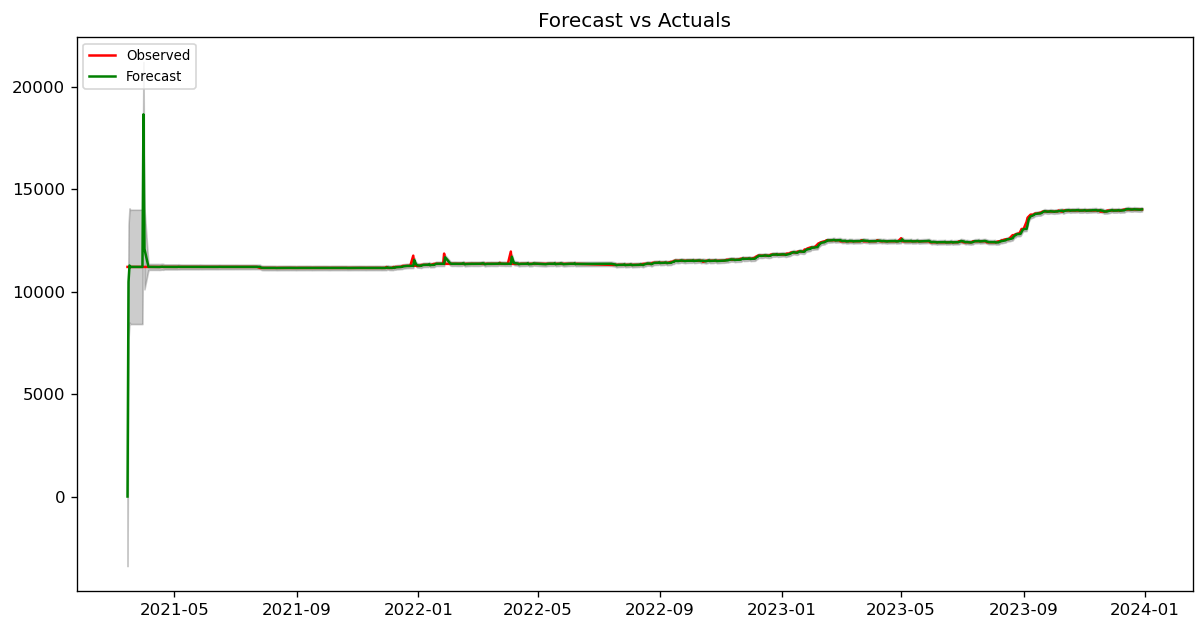

In [39]:
import matplotlib.pyplot as plt

# Calculate predictions for the training dataset to evaluate in-sample prediction performance
pred_insample = results.get_prediction(start=pd.to_datetime('2021-03-15'), dynamic=False)
pred_insample_conf = pred_insample.conf_int()

# Calculate MAPE and RMSE
y_forecasted = pred_insample.predicted_mean
y_truth = dataset['Harga Beras'][y_forecasted.index]

# Compute the mean absolute percentage error
mape = np.mean(np.abs((y_truth - y_forecasted) / y_truth)) * 100

# Compute the root mean square error
rmse = sqrt(mean_squared_error(y_truth, y_forecasted))

print('The Mean Absolute Percentage Error for the forecast of Harga Beras is {:.2f}%'.format(mape))
print('The Root Mean Square Error of our forecasts is {}'.format(round(rmse, 2)))

# Plot the predictions
plt.figure(figsize=(12,6))
plt.plot(y_truth.index, y_truth, label='Observed', color='r')
plt.plot(y_forecasted.index, y_forecasted, label='Forecast', color='g')

# Plot the confidence intervals
plt.fill_between(pred_insample_conf.index,
                 pred_insample_conf.iloc[:, 0],
                 pred_insample_conf.iloc[:, 1], color='k', alpha=.2)

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

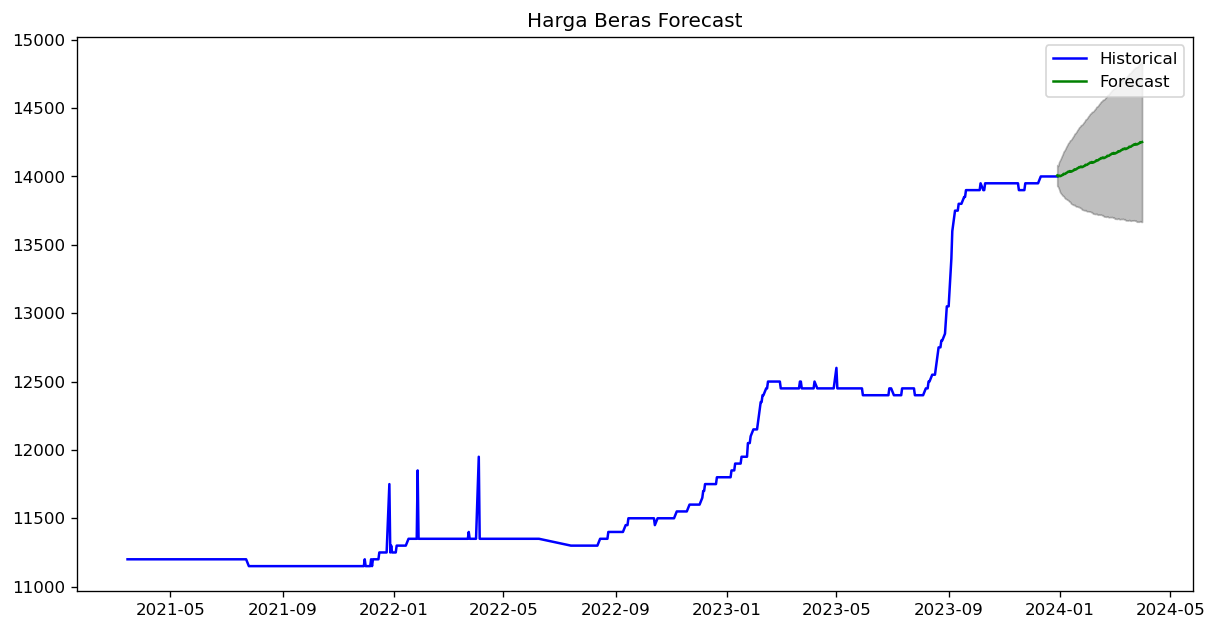

In [40]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Resample the data to ensure a continuous daily frequency
# dataset_resampled = dataset.resample('D').asfreq()

# # Fill any missing values
# dataset_resampled['Harga Beras'].interpolate(method='time', inplace=True)

# # Fit the SARIMA model on the resampled data
# model = SARIMAX(dataset_resampled['Harga Beras'], order=(5,1,0), seasonal_order=(0,1,1,12))
# results = model.fit(disp=0)

# # Get the last date in the resampled dataset
# last_date = dataset_resampled.index[-1]

# # Calculate the end date for the forecast
# end_date = '2024-03-31'

# # Forecast until March 2024
# forecast = results.get_prediction(start=pd.to_datetime(last_date), end=pd.to_datetime(end_date), dynamic=False)
# forecast_conf = forecast.conf_int()

# # Plot the forecast along with the confidence interval
# plt.figure(figsize=(12,6))
# plt.plot(dataset_resampled.index, dataset_resampled['Harga Beras'], label='Historical', color='blue')
# plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='green')
# plt.fill_between(forecast_conf.index,
#                  forecast_conf.iloc[:, 0],
#                  forecast_conf.iloc[:, 1], color='k', alpha=.25)
# plt.title('Harga Beras Forecast')
# plt.legend()
# plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import sqrt

# Split the data into training and test sets
train = dataset_resampled['Harga Beras'][:-30]
test = dataset_resampled['Harga Beras'][-30:]

# Fit the SARIMA model on the training data
model = SARIMAX(train, order=(5,1,0), seasonal_order=(0,1,1,12))
results = model.fit(disp=0)

# Generate predictions for the test set
predictions = results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Calculate error metrics
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)

mse, rmse, mae, r2

(413.0460398149113,
 20.323534136928824,
 17.121578045038707,
 0.20341120892838638)

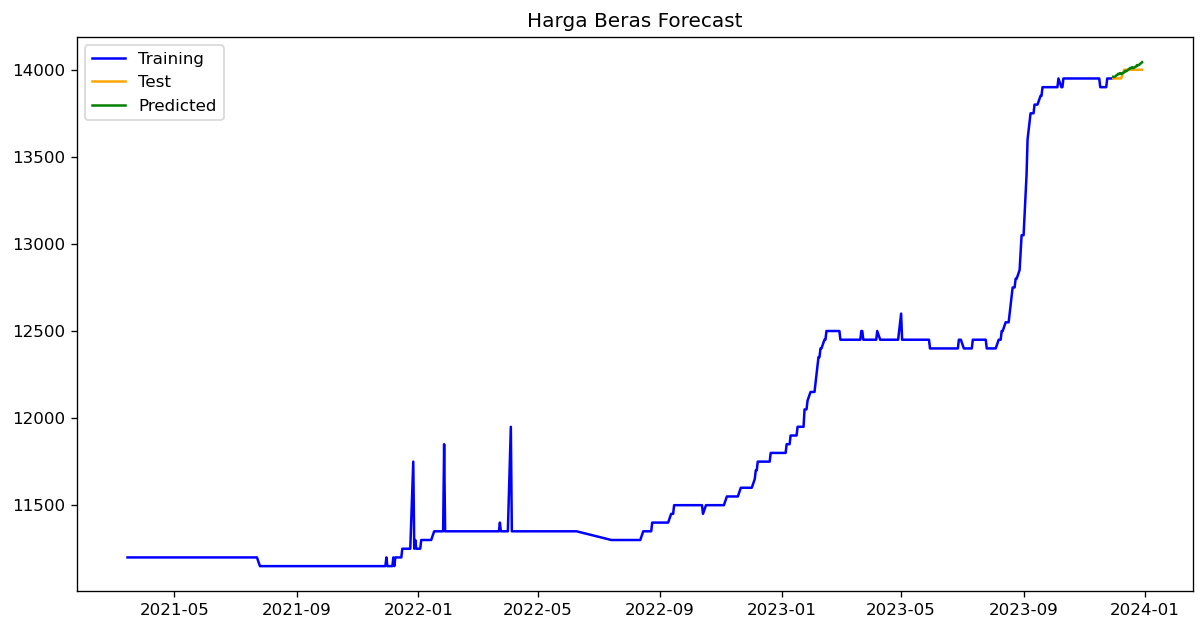

In [42]:
# Plot the actual values and the predicted values
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(predictions.index, predictions, label='Predicted', color='green')
plt.legend(loc='best')
plt.title('Harga Beras Forecast')
plt.show()

# TEST 5 SARIMAX

In [3]:
# split into train and test sets
X = dataset.values
size = int(len(X) * 0.8)
train_data, test_data = X[0:size], X[size:len(X)]

NameError: name 'dataset' is not defined

In [2]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(train_data['Harga Beras'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 exog = train_data.drop('Harga Beras', axis=1),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit(maxiter=100)

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

NameError: name 'np' is not defined

In [1]:
# Fit the model on the training data
model_fit = model.fit(disp=False)

# Make prediction for the same number of steps as the size of your test data
exog_future = test_data.drop('Harga Beras', axis=1)  # Use exogenous data from the test set
forecast = model_fit.predict(len(train_data), len(train_data) + len(test_data) - 1, exog=exog_future)

# Now the test data and forecast should have the same number of samples
assert len(test_data['Harga Beras']) == len(forecast), "Number of samples does not match"

# Calculate the error metrics
mae = mean_absolute_error(test_data['Harga Beras'], forecast)
mse = mean_squared_error(test_data['Harga Beras'], forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

NameError: name 'model' is not defined

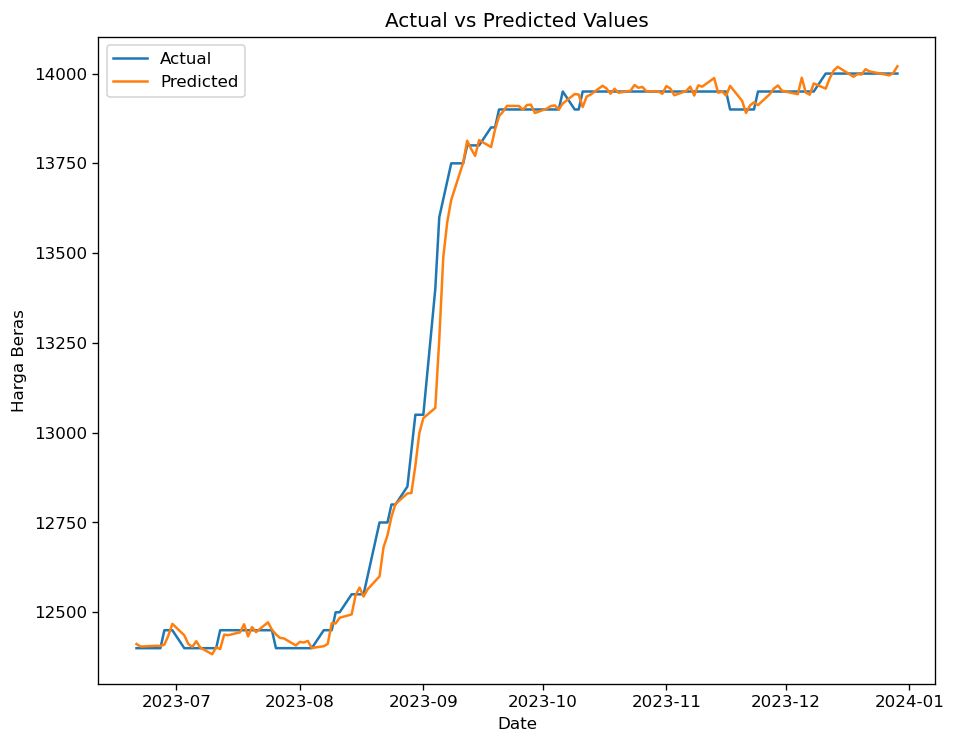

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.plot(test_data.index, test_data['Harga Beras'], label='Actual')

# Plot the predicted values
plt.plot(test_data.index, forecast, label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

plt.show()

In [ ]:
dataset

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
Tanggal,,,,,,,,,,
2021-03-15,10,4000,4150,5050,9465,14419,11200,4960,9600,17161
2021-03-16,10,3850,4100,4740,9360,14419,11200,4960,9600,17161
2021-03-17,10,4160,4230,4950,9400,14419,11200,4960,9600,17161
2021-03-18,10,4120,4190,4730,9340,14419,11200,4960,9600,17161
2021-03-19,10,4190,4290,4990,9410,14419,11200,4960,9600,17161
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,30,6770,6850,7980,13100,14391,14000,5444,6800,17598
2023-12-22,30,6600,6760,8050,13095,14391,14000,5444,6800,17598
2023-12-27,30,6620,6760,8030,13120,14391,14000,5444,6800,17598


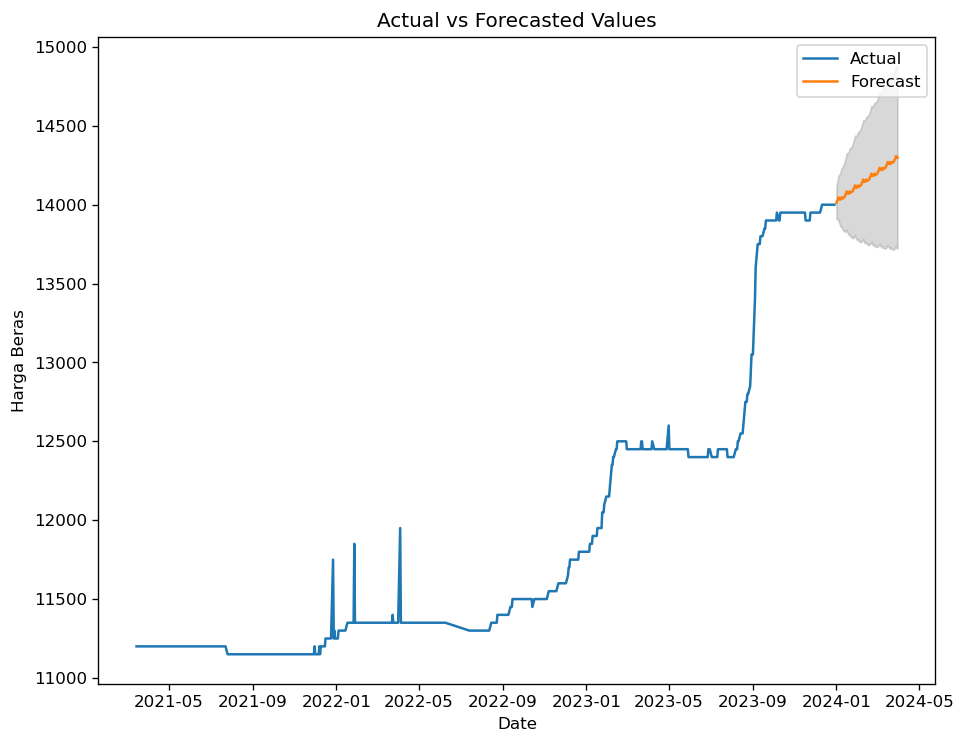

MSE: 5294.124804877396
RMSE: 72.76073669828664
MAE: 23.742042743467675


In [ ]:
# Fit the model on the entire data
model_fit = model.fit(disp=False)

# Make forecast for the next 90 days
# Assume that the future values of the exogenous variables will be the same as their most recent values
exog_future = pd.DataFrame([train_data.drop('Harga Beras', axis=1).iloc[-1]] * 90)

forecast_results = model_fit.get_forecast(steps=90, exog=exog_future)

# Get the forecast and the confidence interval
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Plot the actual values
plt.plot(train_data.index, train_data['Harga Beras'], label='Actual')

# Plot the forecasted values
forecast_index = pd.date_range(start='2024-01-01', end='2024-03-30', freq='D')  # Create a date range for the forecast
plt.plot(forecast_index, forecast, label='Forecast')

# Plot the confidence interval
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3)

plt.title('Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

plt.show()

# Get the first and last date in the dataset
start_date = dataset.index.min()
end_date = dataset.index.max()

# Get the in-sample prediction and the confidence interval
in_sample_preds = model_fit.get_prediction(start=start_date, end=end_date, dynamic=False)
in_sample = in_sample_preds.predicted_mean

# Calculate the errors for the in-sample prediction
mse = mean_squared_error(dataset['Harga Beras'], in_sample)
rmse = np.sqrt(mse)
mae = mean_absolute_error(dataset['Harga Beras'], in_sample)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

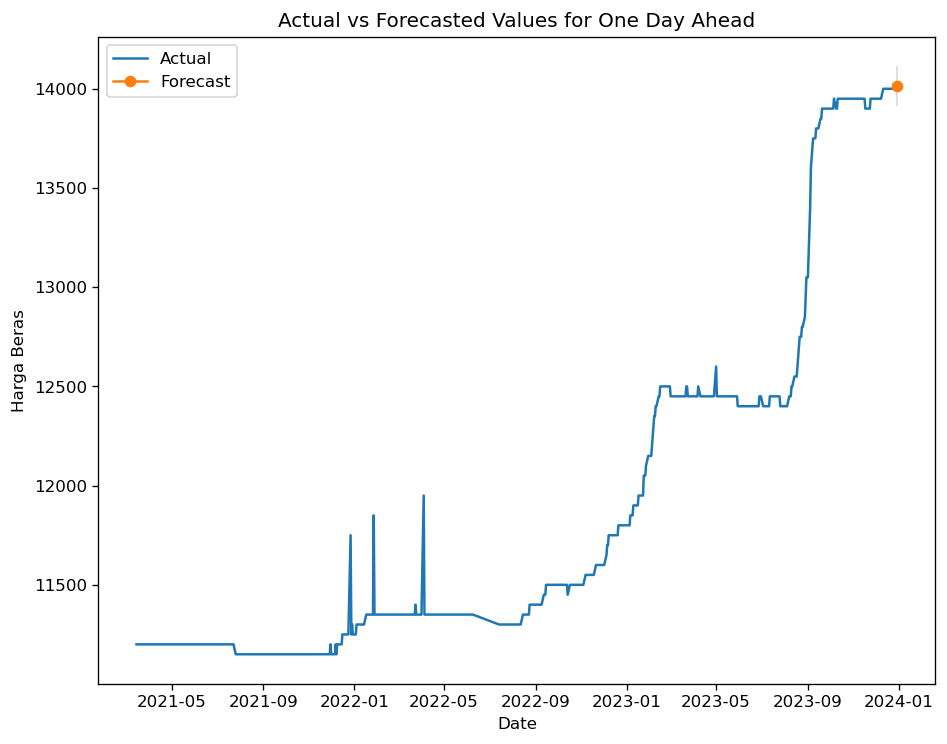

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model on the entire data
model_fit = model.fit(disp=False)

# Make forecast for the next day
# Assume that the future value of the exogenous variables will be the same as their most recent values
exog_future = pd.DataFrame([dataset.drop('Harga Beras', axis=1).iloc[-1]])

forecast_results = model_fit.get_forecast(steps=1, exog=exog_future)

# Get the forecast and the confidence interval
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Plot the actual values
plt.plot(dataset.index, dataset['Harga Beras'], label='Actual')

# Plot the forecasted value
forecast_index = pd.date_range(start=dataset.index[-1] + pd.Timedelta(days=1), periods=1, freq='D')  # Create a date range for the forecast

plt.plot(forecast_index, forecast, label='Forecast', marker='o')

# Plot the confidence interval
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3)

plt.title('Actual vs Forecasted Values for One Day Ahead')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

plt.show()


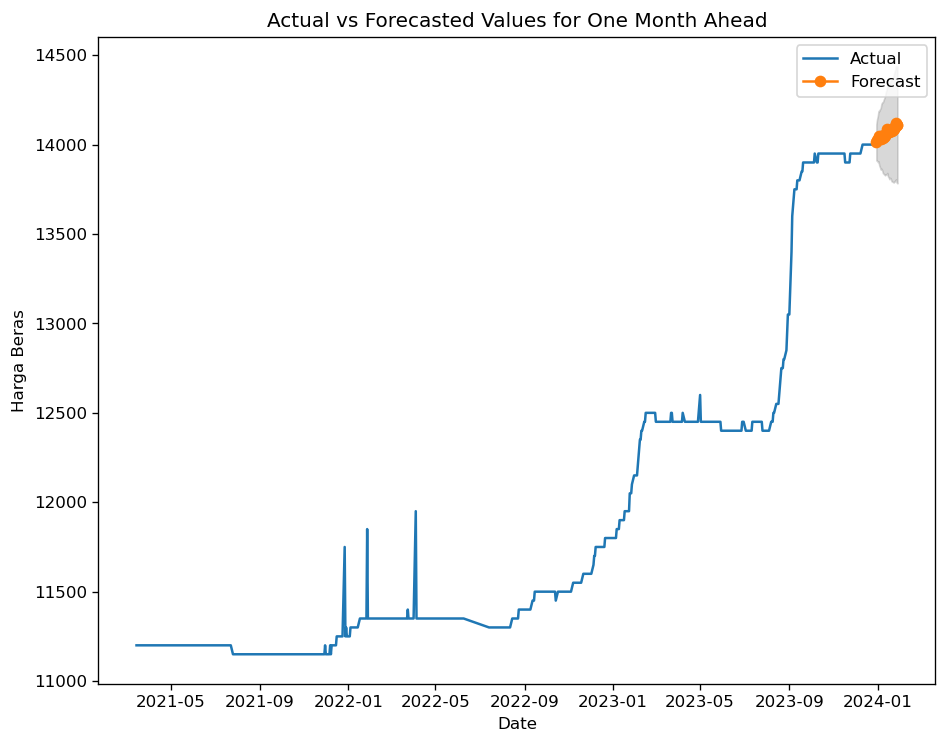

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model on the entire data
model_fit = model.fit(disp=False)

# Assume that the future values of the exogenous variables will be the same as their most recent values
# Get the last row of the DataFrame
last_row = dataset.drop('Harga Beras', axis=1).iloc[-1:]

# Repeat the last row 30 times
exog_future = pd.concat([last_row]*30).reset_index(drop=True)

forecast_results = model_fit.get_forecast(steps=30, exog=exog_future)

# Get the forecast and the confidence interval
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Plot the actual values
plt.plot(dataset.index, dataset['Harga Beras'], label='Actual')

# Plot the forecasted values one month ahead
forecast_index = pd.date_range(start=dataset.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')  # Create a date range for the forecast

plt.plot(forecast_index, forecast, label='Forecast', marker='o')

# Plot the confidence interval for the forecasted month
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3)

plt.title('Actual vs Forecasted Values for One Month Ahead')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

plt.show()


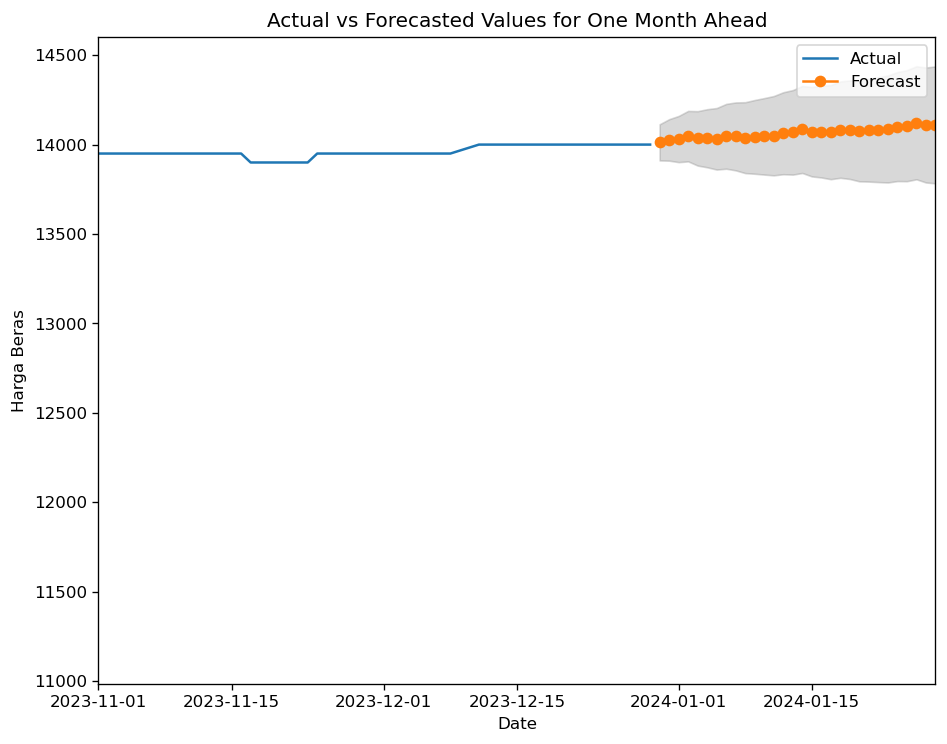

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model on the entire data
model_fit = model.fit(disp=False)

# Assume that the future values of the exogenous variables will be the same as their most recent values
# Get the last row of the DataFrame
last_row = dataset.drop('Harga Beras', axis=1).iloc[-1:]

# Repeat the last row 30 times
exog_future = pd.concat([last_row]*30).reset_index(drop=True)

forecast_results = model_fit.get_forecast(steps=30, exog=exog_future)

# Get the forecast and the confidence interval
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Plot the actual values
plt.plot(dataset.index, dataset['Harga Beras'], label='Actual')

# Plot the forecasted values one month ahead
forecast_index = pd.date_range(start=dataset.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')  # Create a date range for the forecast

plt.plot(forecast_index, forecast, label='Forecast', marker='o')

# Plot the confidence interval for the forecasted month
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3)

plt.title('Actual vs Forecasted Values for One Month Ahead')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()

# Set the x-axis limits to zoom into the plot
plt.xlim([pd.to_datetime('2023-11-01'), forecast_index[-1]])

plt.show()

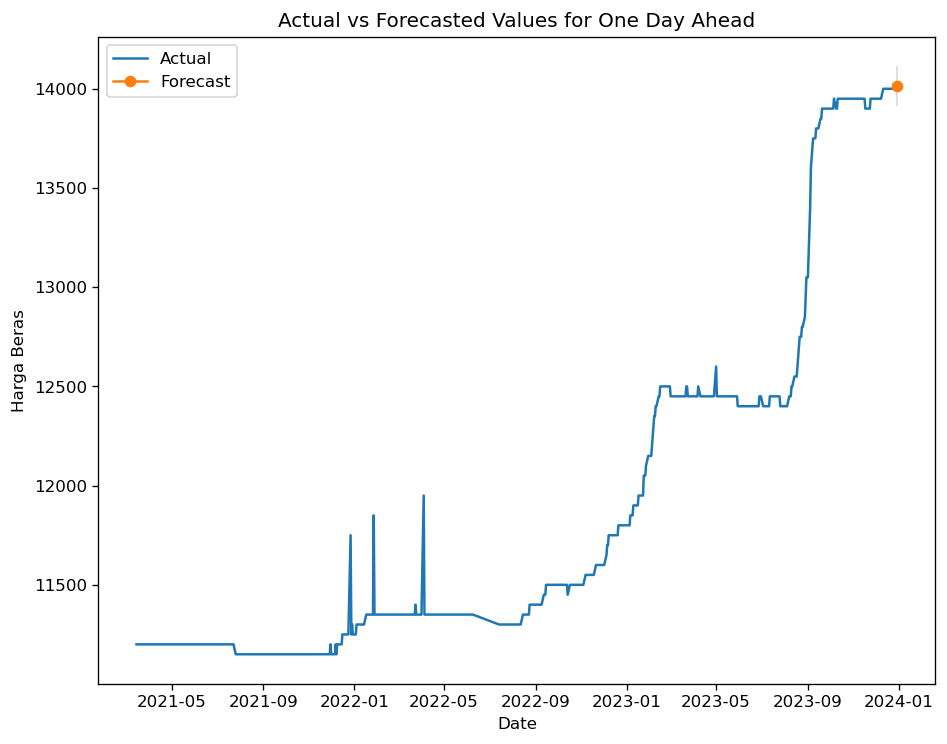

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model on the entire data
model_fit = model.fit(disp=False)

# Assume that the future value of the exogenous variables will be the same as the most recent value
last_row = dataset.drop('Harga Beras', axis=1).iloc[-1:]

forecast_results = model_fit.get_forecast(steps=1, exog=last_row)

# Get the forecast and the confidence interval
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Plot the actual values
plt.plot(dataset.index, dataset['Harga Beras'], label='Actual')

# Plot the forecasted value one day ahead
forecast_index = pd.date_range(start=dataset.index[-1] + pd.Timedelta(days=1), periods=1, freq='D')

plt.plot(forecast_index, forecast, label='Forecast', marker='o')

# Plot the confidence interval for the forecasted day
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3)

plt.title('Actual vs Forecasted Values for One Day Ahead')
plt.xlabel('Date')
plt.ylabel('Harga Beras')
plt.legend()
 
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Define endog and exog
endog = dataset['Harga Beras']
exog = dataset.drop('Harga Beras', axis=1)

# Fit the model
model = sm.tsa.statespace.SARIMAX(endog, exog, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
results = model.fit()

# Print the summary
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39950D+00    |proj g|=  8.90175D-02


 This problem is unconstrained.



At iterate    5    f=  5.38676D+00    |proj g|=  1.29980D-01

At iterate   10    f=  5.36099D+00    |proj g|=  1.01636D-02

At iterate   15    f=  5.35834D+00    |proj g|=  1.14314D-02

At iterate   20    f=  5.34397D+00    |proj g|=  6.58143D-02

At iterate   25    f=  5.33211D+00    |proj g|=  3.35576D-02

At iterate   30    f=  5.30233D+00    |proj g|=  1.99430D-01

At iterate   35    f=  5.28895D+00    |proj g|=  1.56534D-01

At iterate   40    f=  5.28336D+00    |proj g|=  4.78304D-02

At iterate   45    f=  5.28105D+00    |proj g|=  6.81937D-03

At iterate   50    f=  5.28100D+00    |proj g|=  4.49816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

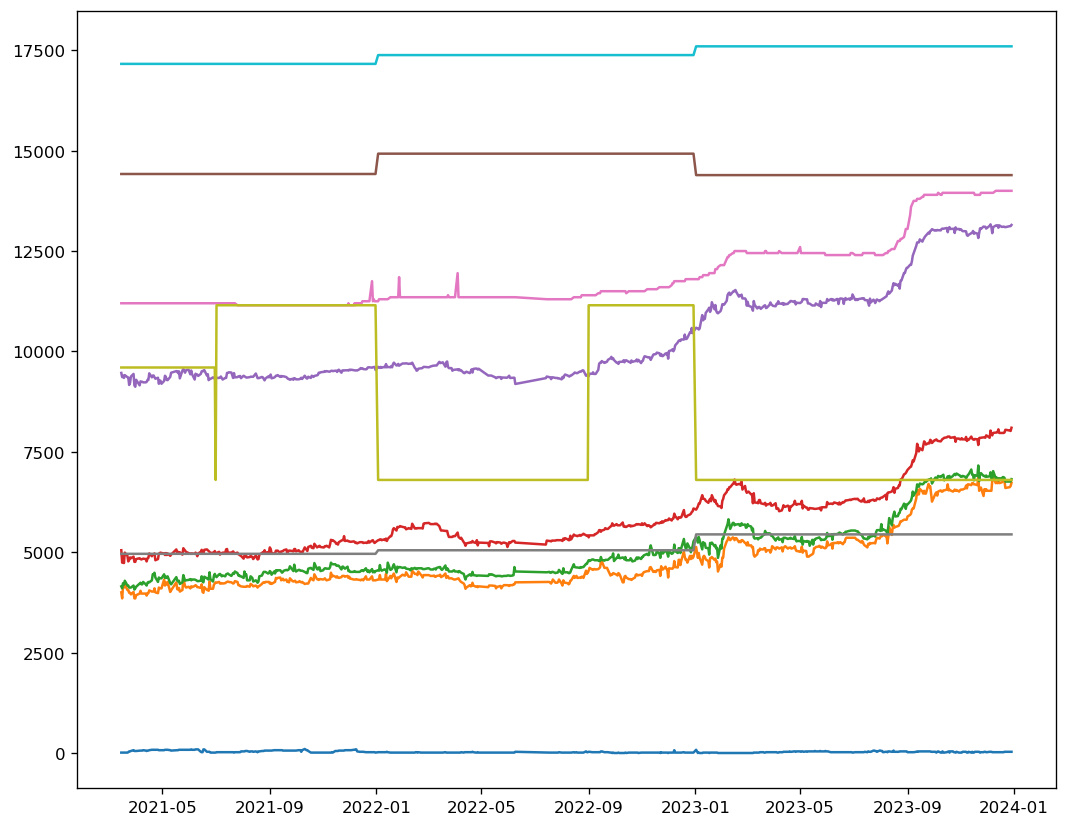

In [ ]:
plt.plot(dataset)
plt.tight_layout()
plt.show()

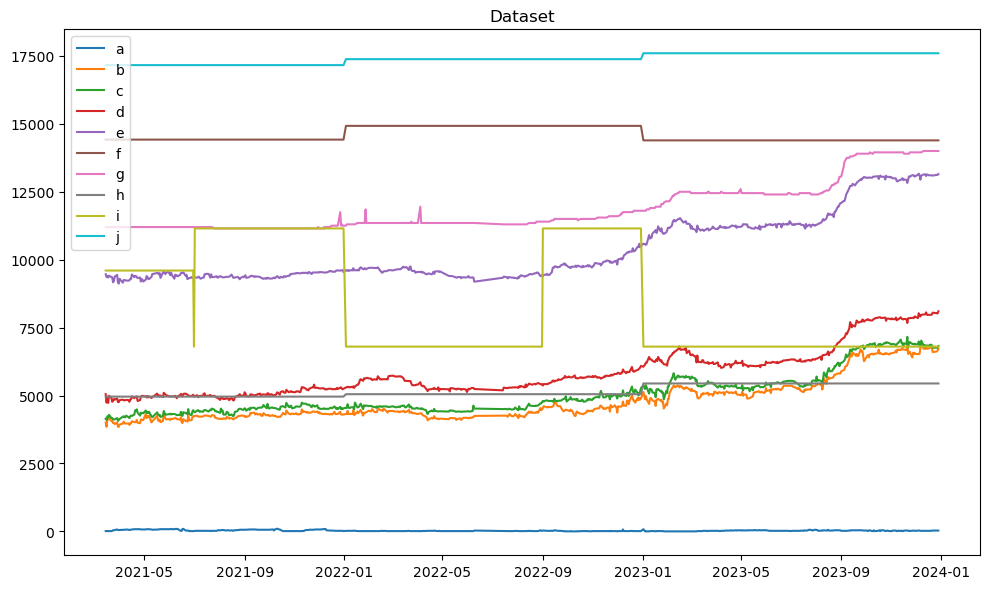

In [ ]:
# Assuming 'dataset' is a pandas DataFrame
dataset.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

plt.figure(figsize=(10, 6))

for column in dataset.columns:
    plt.plot(dataset[column], label=column)

plt.title('Dataset')
plt.tight_layout()
plt.legend()
plt.show()